## Purpose of the Dataset¶
The primary purpose of this dataset is to analyze and predict customer churn. By understanding the factors that contribute to churn, the telecom company can develop strategies to retain customers and reduce churn rates.

## Import the liberies

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score


In [2]:
df = pd.read_excel(r"C:\Users\User\Documents\IRON HACK DA 2024\Sixth Project\Sixth-ML\Data\Raw data\Telco_customer_churn.xlsx")


In [3]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [5]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [6]:
df.describe(include='all')


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
count,7043,7043.0,7043,7043,7043,7043.000000,7043,7043.000000,7043.000000,7043,...,7043,7043,7043,7043.000000,7043.0,7043,7043.000000,7043.000000,7043.000000,1869
unique,7043,NaN,1,1,1129,NaN,1652,NaN,NaN,2,...,3,2,4,NaN,6531.0,2,NaN,NaN,NaN,20
top,3668-QPYBK,NaN,United States,California,Los Angeles,NaN,"33.964131, -118.272783",NaN,NaN,Male,...,Month-to-month,Yes,Electronic check,NaN,20.2,No,NaN,NaN,NaN,Attitude of support person
freq,1,NaN,7043,7043,305,NaN,5,NaN,NaN,3555,...,3875,4171,2365,NaN,11.0,5174,NaN,NaN,NaN,192
mean,NaN,1.0,NaN,NaN,NaN,93521.964646,NaN,36.282441,-119.798880,NaN,...,NaN,NaN,NaN,64.761692,NaN,NaN,0.265370,58.699418,4400.295755,NaN
std,NaN,0.0,NaN,NaN,NaN,1865.794555,NaN,2.455723,2.157889,NaN,...,NaN,NaN,NaN,30.090047,NaN,NaN,0.441561,21.525131,1183.057152,NaN
min,NaN,1.0,NaN,NaN,NaN,90001.000000,NaN,32.555828,-124.301372,NaN,...,NaN,NaN,NaN,18.250000,NaN,NaN,0.000000,5.000000,2003.000000,NaN
25%,NaN,1.0,NaN,NaN,NaN,92102.000000,NaN,34.030915,-121.815412,NaN,...,NaN,NaN,NaN,35.500000,NaN,NaN,0.000000,40.000000,3469.000000,NaN
50%,NaN,1.0,NaN,NaN,NaN,93552.000000,NaN,36.391777,-119.730885,NaN,...,NaN,NaN,NaN,70.350000,NaN,NaN,0.000000,61.000000,4527.000000,NaN
75%,NaN,1.0,NaN,NaN,NaN,95351.000000,NaN,38.224869,-118.043237,NaN,...,NaN,NaN,NaN,89.850000,NaN,NaN,1.000000,75.000000,5380.500000,NaN


## Data Preprocessing

In [7]:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

## Handle the missing value

In [8]:
modes = df["Churn Reason"].mode()
modes

0    Attitude of support person
Name: Churn Reason, dtype: object

In [9]:
df["Churn Reason"] = df["Churn Reason"].fillna(df["Churn Reason"].mode()[0])

In [10]:
df.duplicated().sum()

0

# Drop columns that are not relevant for model training

In [11]:
df = df.drop(columns=['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Churn Reason'])

In [12]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce').fillna(0)

Encoding Categorical Variables /One-Hot Encoding

In [13]:
categorical_columns = ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 
                       'Phone Service', 'Multiple Lines', 'Internet Service', 
                       'Online Security', 'Online Backup', 'Device Protection', 
                       'Tech Support', 'Streaming TV', 'Streaming Movies', 
                       'Contract', 'Paperless Billing', 'Payment Method']

In [14]:
# Perform one-hot encoding on categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [15]:
df_encoded.head()

,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Gender_Male,...,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_One year,Contract_Two year,Paperless Billing_Yes,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,33.964131,-118.272783,2,53.85,108.15,Yes,1,86,3239,1,...,0,0,0,0,0,0,1,0,0,1
1,34.059281,-118.307420,2,70.70,151.65,Yes,1,67,2701,0,...,0,0,0,0,0,0,1,0,1,0
2,34.048013,-118.293953,8,99.65,820.50,Yes,1,86,5372,0,...,0,1,0,1,0,0,1,0,1,0
3,34.062125,-118.315709,28,104.80,3046.05,Yes,1,84,5003,0,...,0,1,0,1,0,0,1,0,1,0
4,34.039224,-118.266293,49,103.70,5036.30,Yes,1,89,5340,1,...,0,1,0,1,0,0,1,0,0,0


In [16]:
# Convert the 'Churn Label' to binary
df_encoded['Churn Label'] = df_encoded['Churn Label'].apply(lambda x: 1 if x == 'Yes' else 0)

In [17]:
# Print data types to check for any non-numeric columns
print(df_encoded.dtypes)

Latitude                                  float64
Longitude                                 float64
Tenure Months                               int64
Monthly Charges                           float64
Total Charges                             float64
Churn Label                                 int64
Churn Value                                 int64
Churn Score                                 int64
CLTV                                        int64
Gender_Male                                 uint8
Senior Citizen_Yes                          uint8
Partner_Yes                                 uint8
Dependents_Yes                              uint8
Phone Service_Yes                           uint8
Multiple Lines_No phone service             uint8
Multiple Lines_Yes                          uint8
Internet Service_Fiber optic                uint8
Internet Service_No                         uint8
Online Security_No internet service         uint8
Online Security_Yes                         uint8


# Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = df_encoded.drop('Churn Label', axis=1)
y = df_encoded['Churn Label']
df_scaled = scaler.fit_transform(X)

# Data Visualization

1. Univariate Analysis /Visualizing Distribution of Variables
2. Bivariate Analysis / Visualizing Relationships between Variables
3. Multivariate Analysi / Correlation Analysis

Univariate Analysis

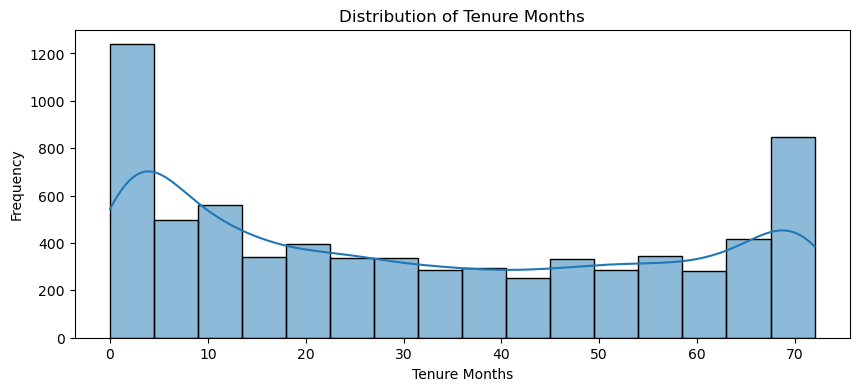

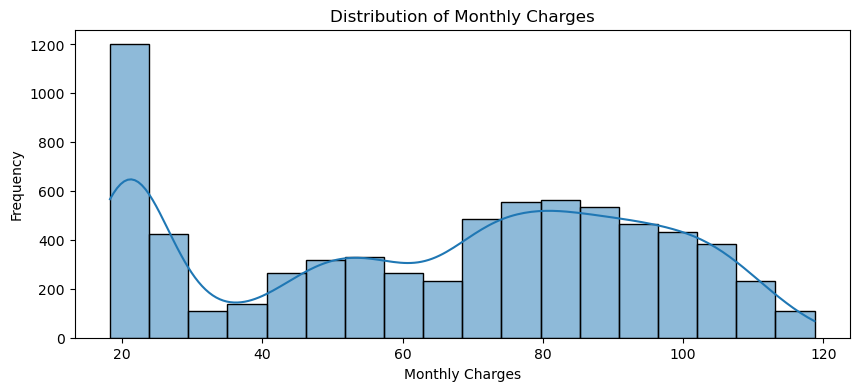

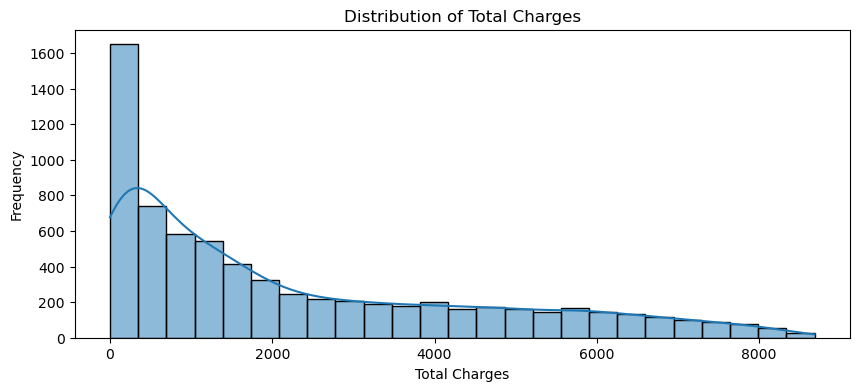

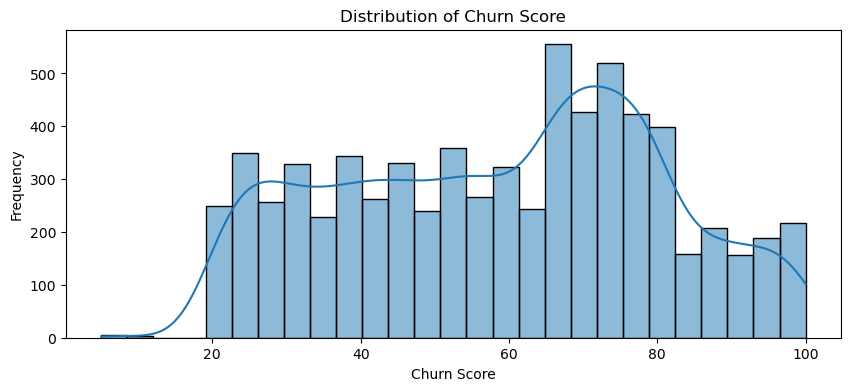

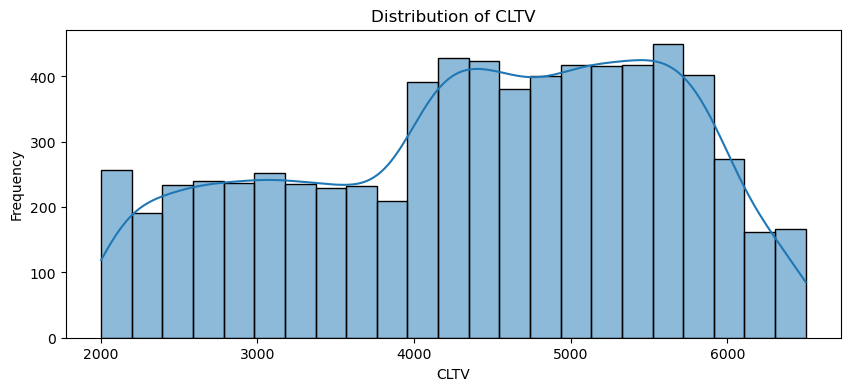

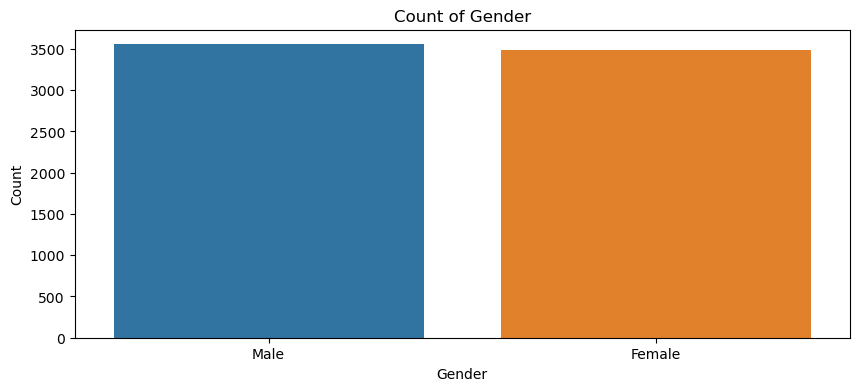

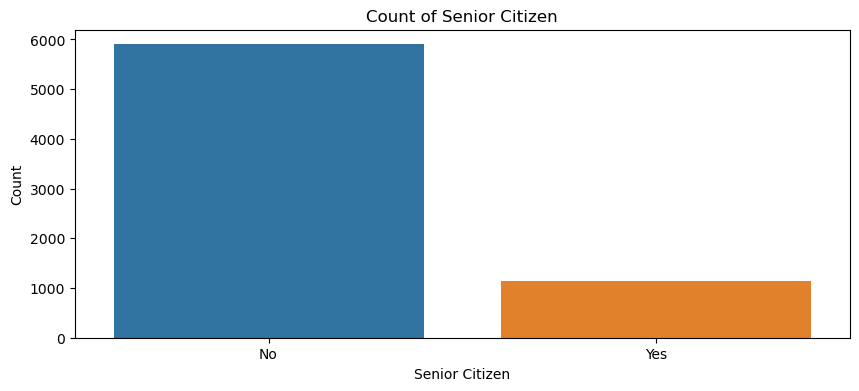

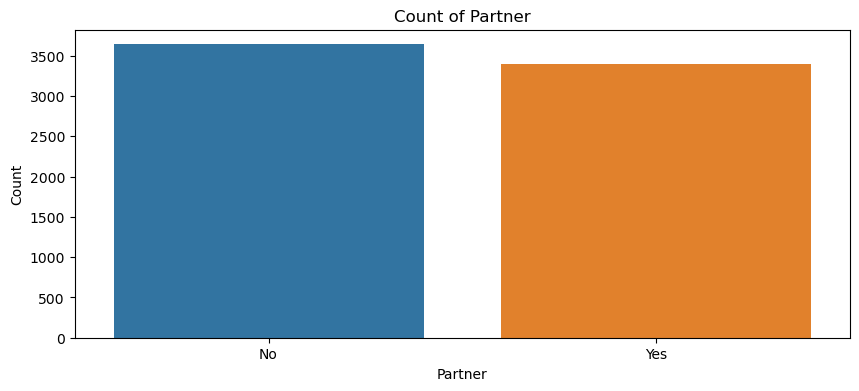

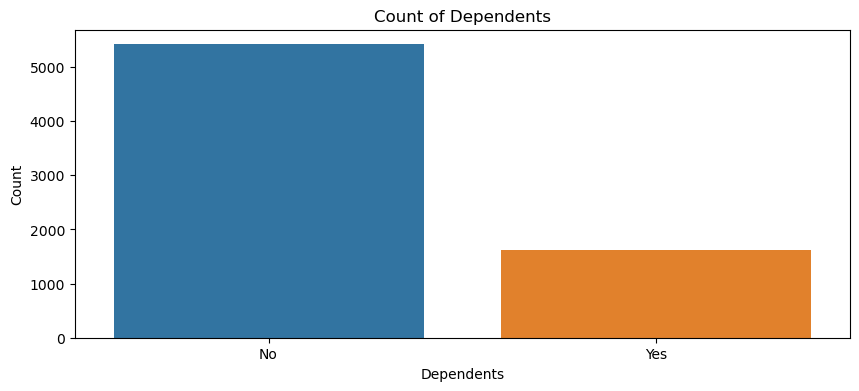

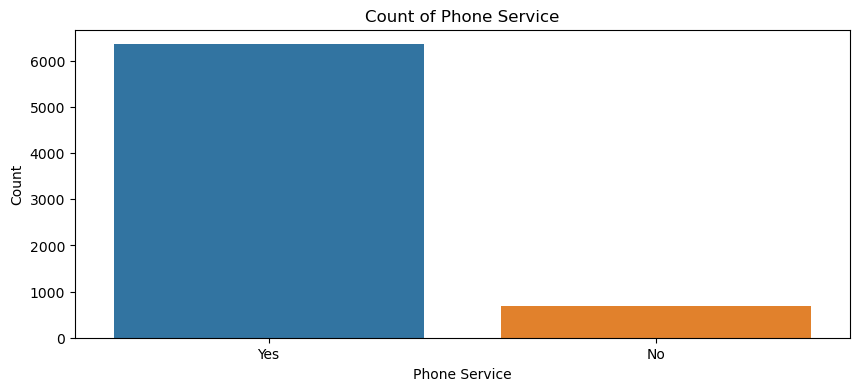

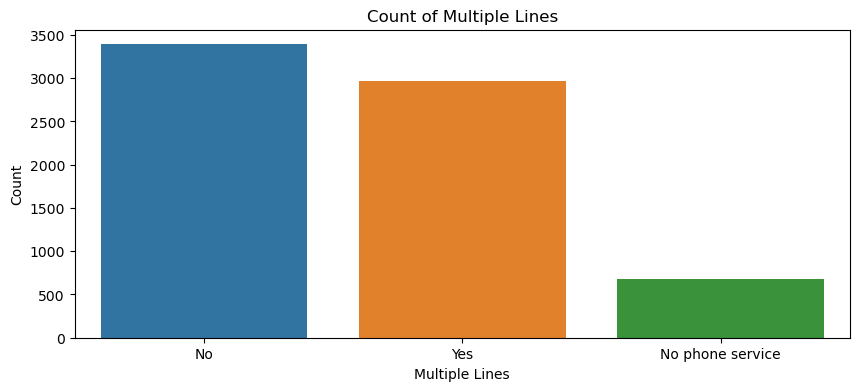

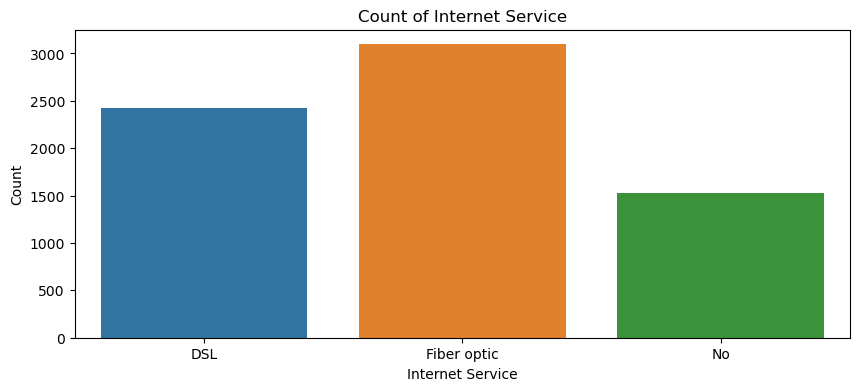

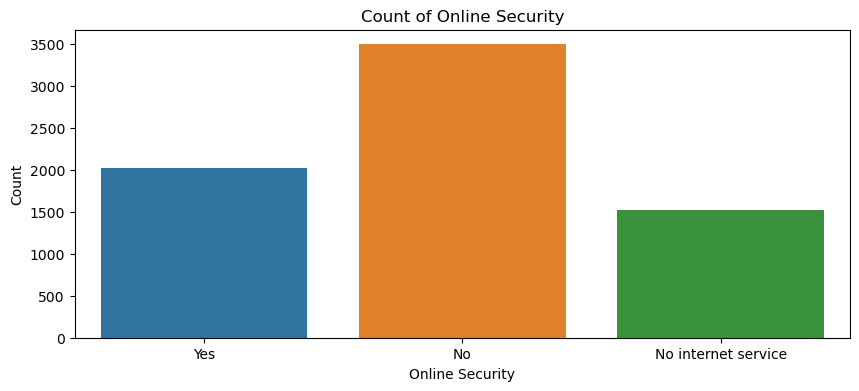

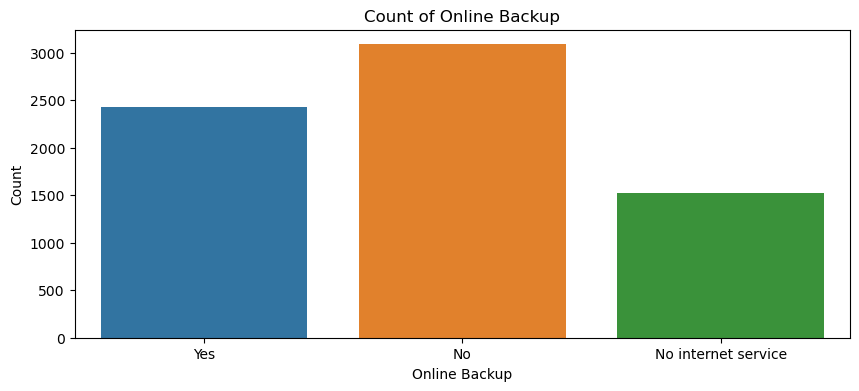

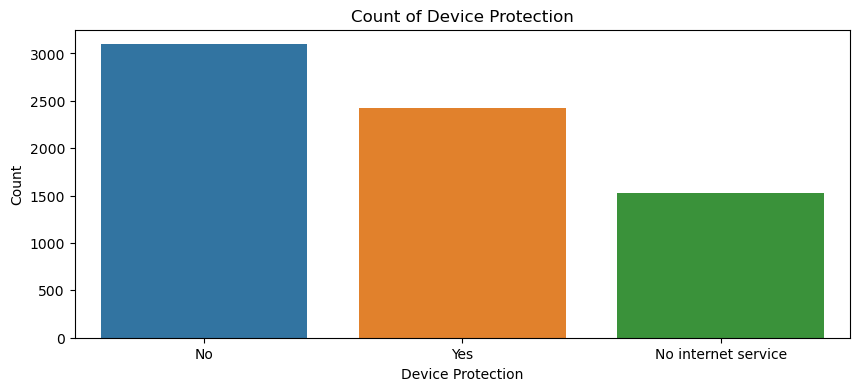

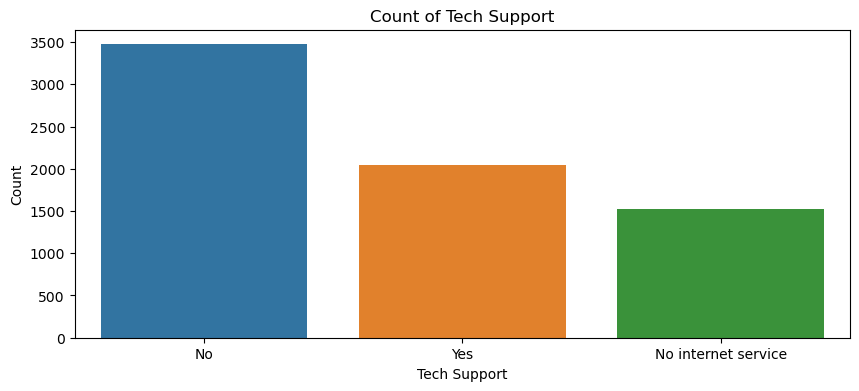

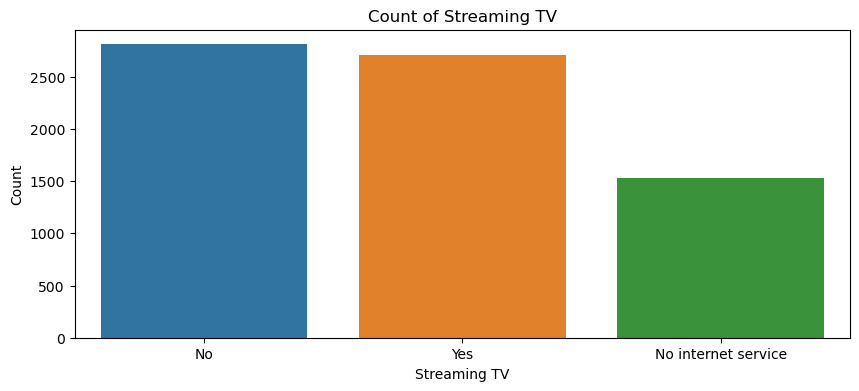

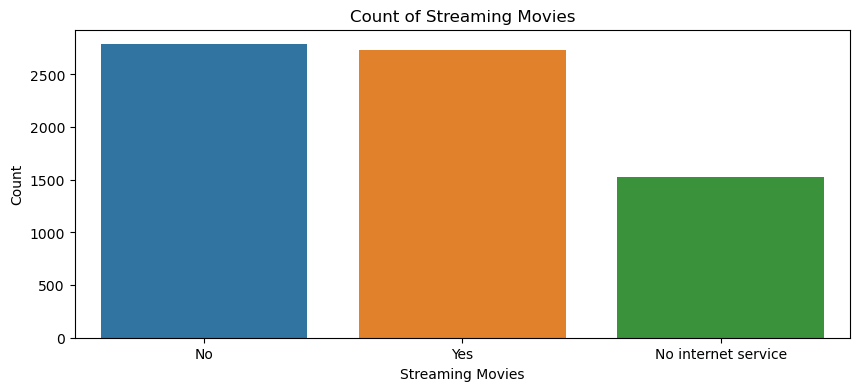

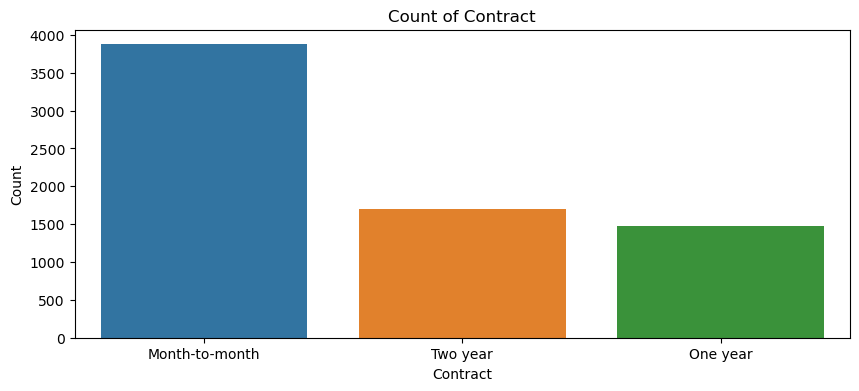

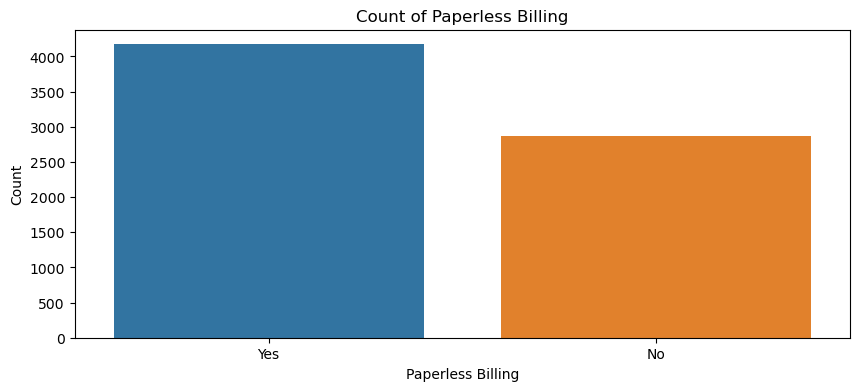

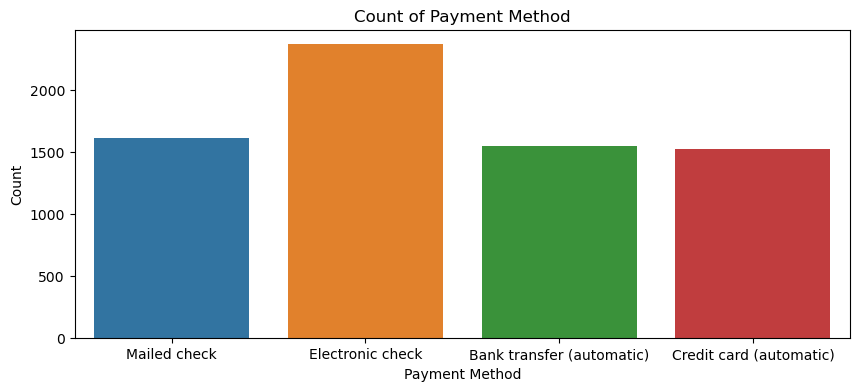

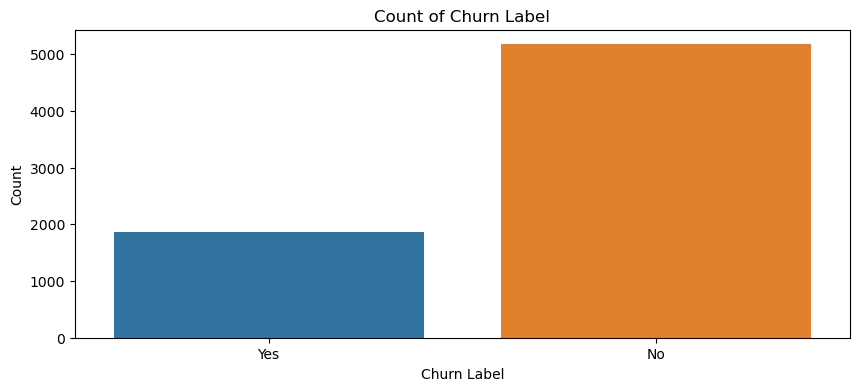

In [20]:
# Univariate Analysis involves examining the distribution of individual variables.

import matplotlib.pyplot as plt
import seaborn as sns

# Univariate analysis of numerical features
numerical_features = ['Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Score', 'CLTV']

for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Univariate analysis of categorical features
categorical_features = ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 
                        'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 
                        'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 
                        'Contract', 'Paperless Billing', 'Payment Method', 'Churn Label']

for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=feature, data=df)
    plt.title(f'Count of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()



# Bivariate Analysis

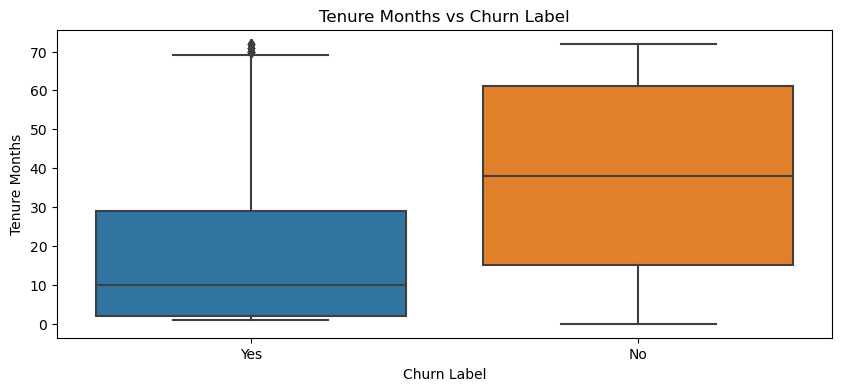

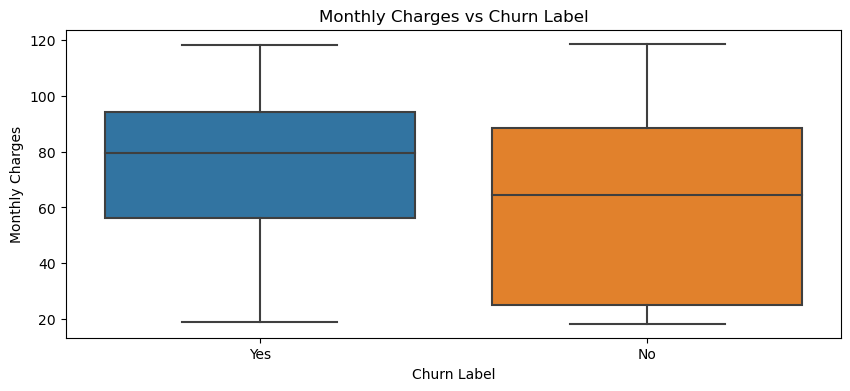

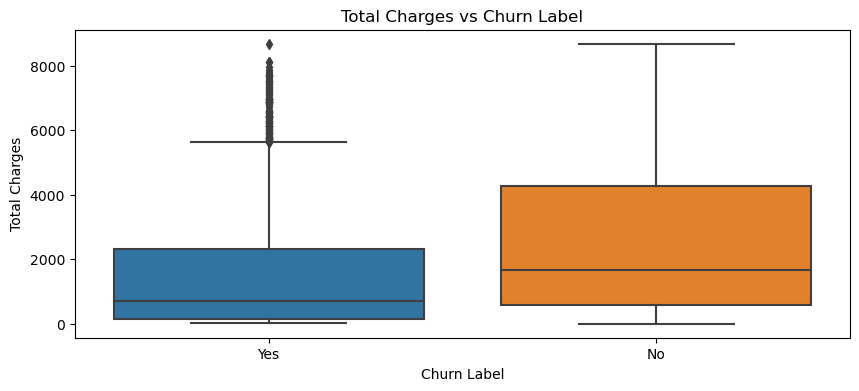

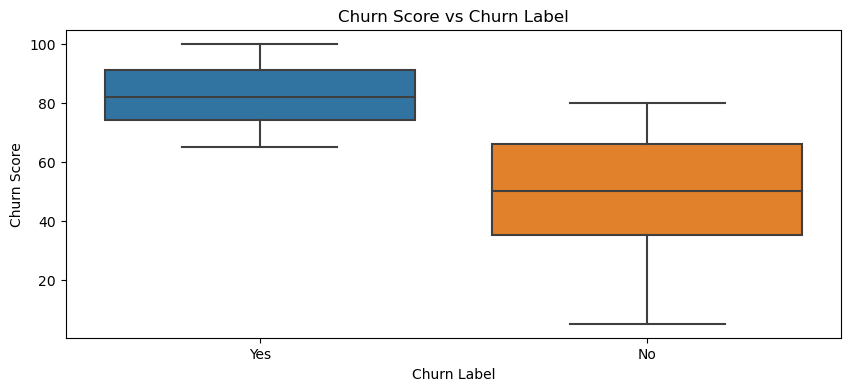

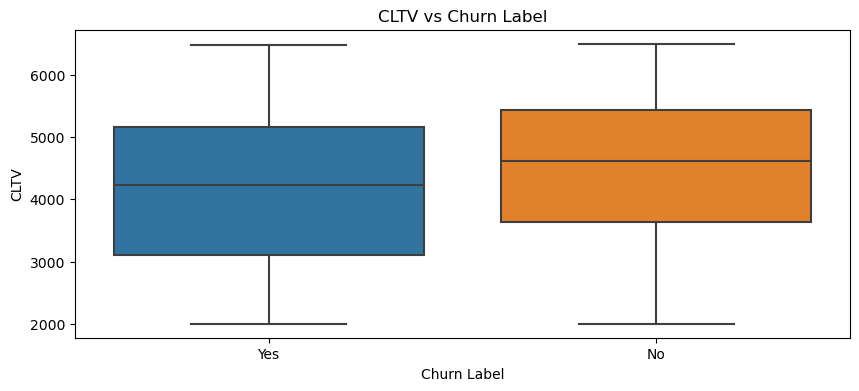

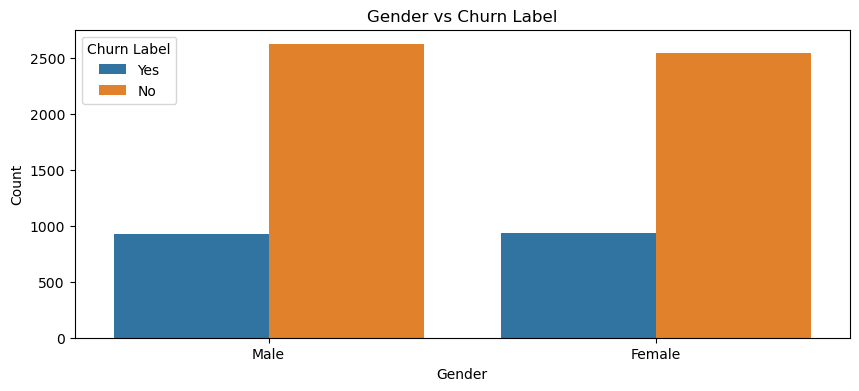

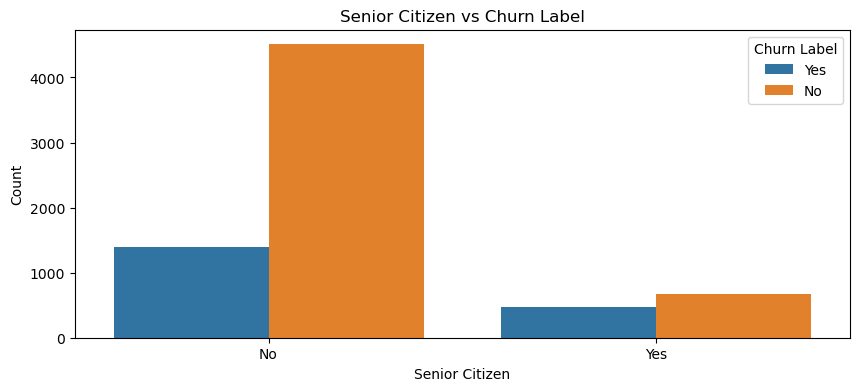

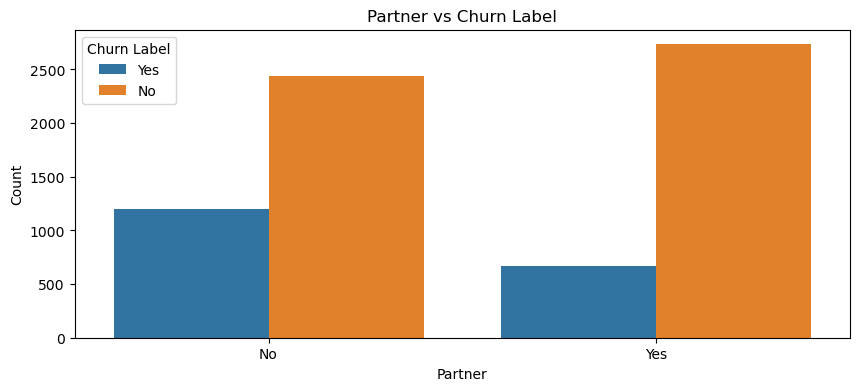

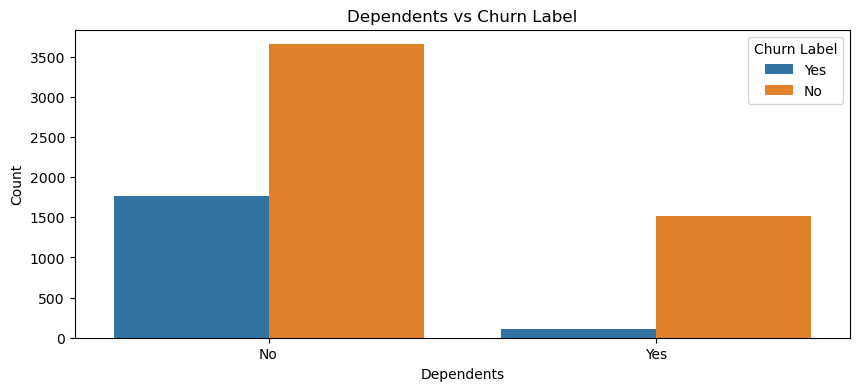

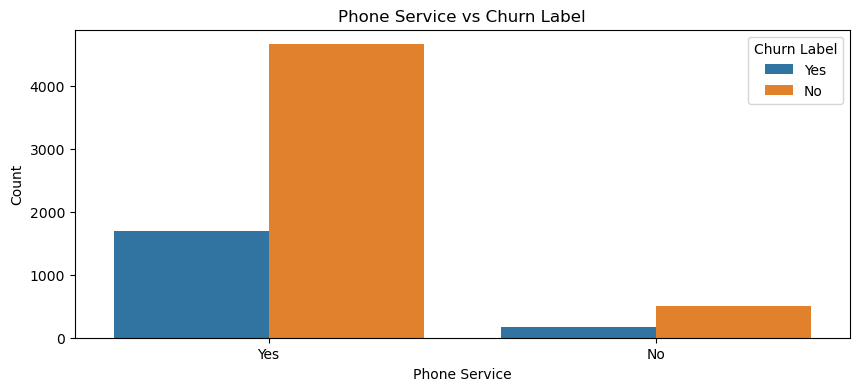

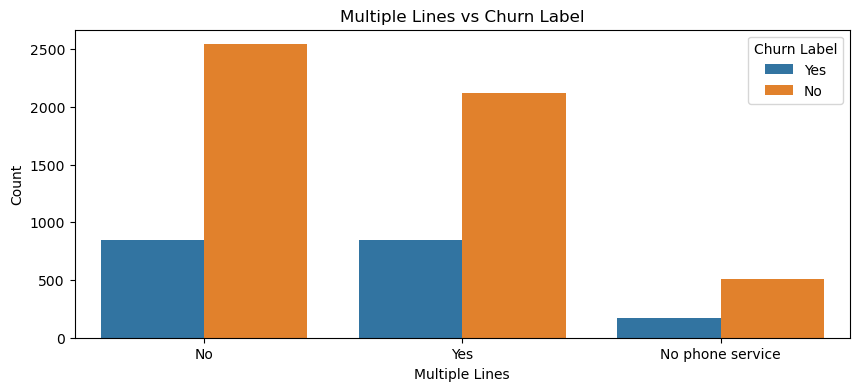

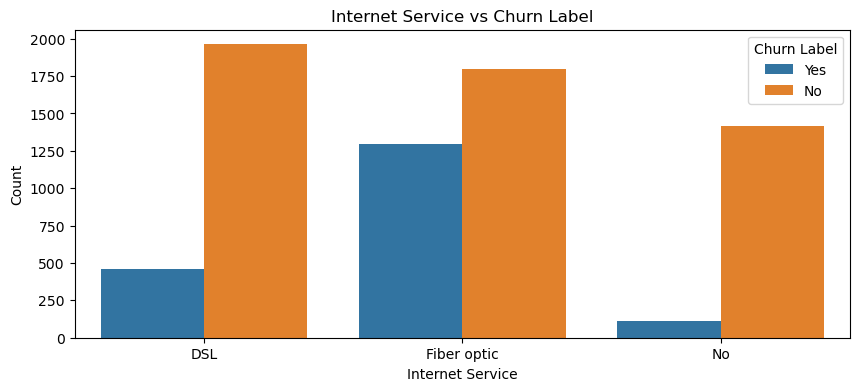

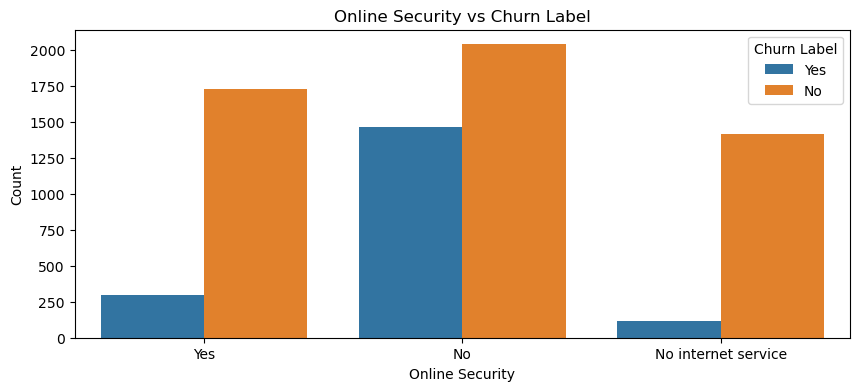

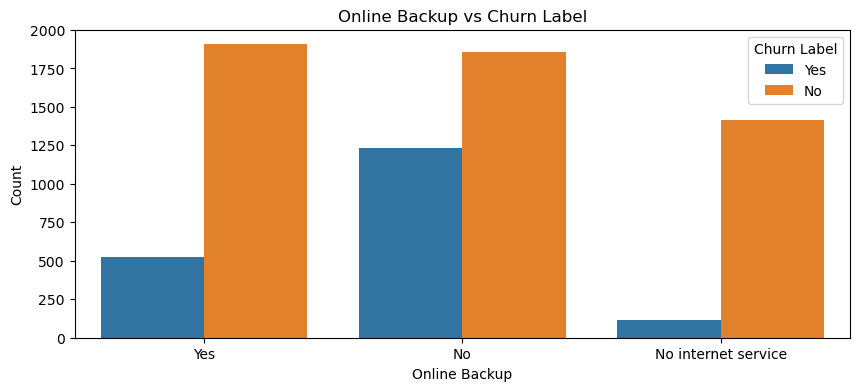

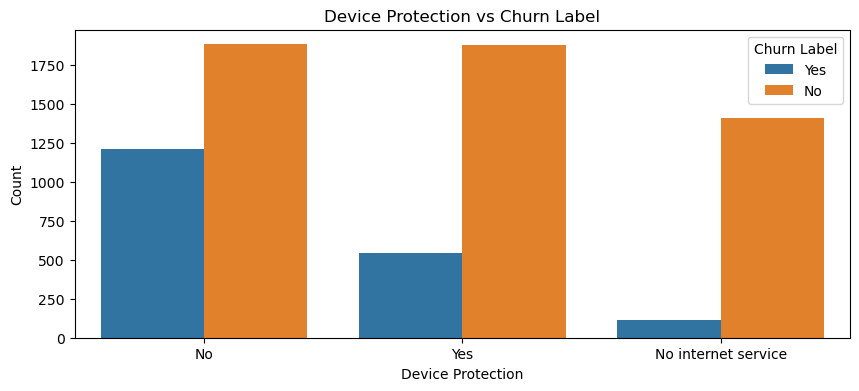

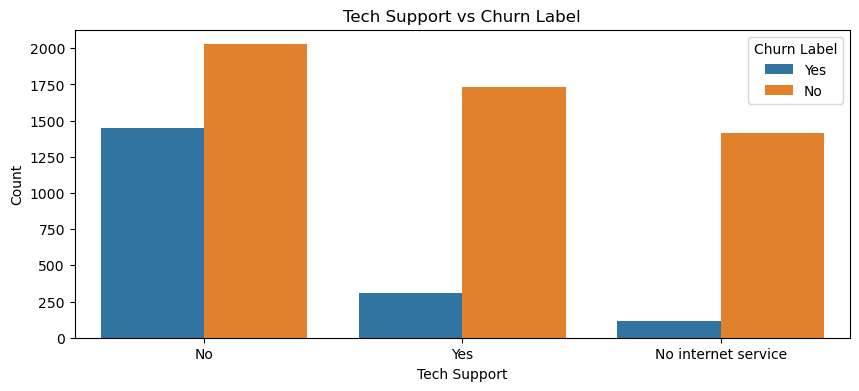

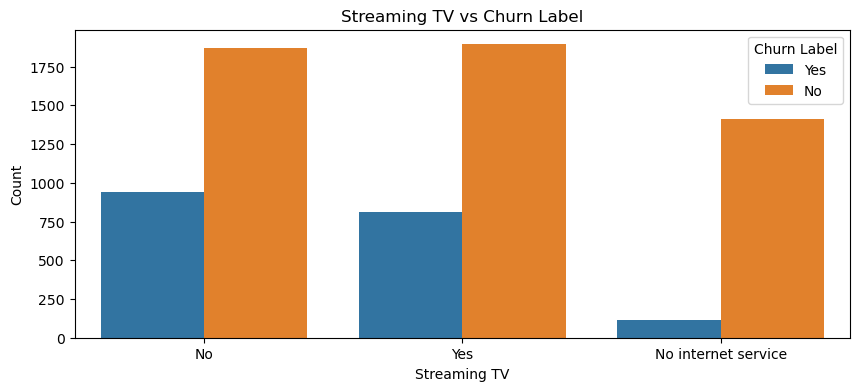

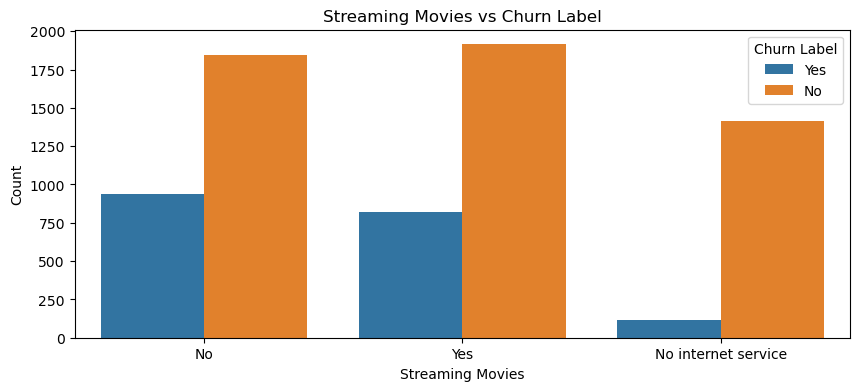

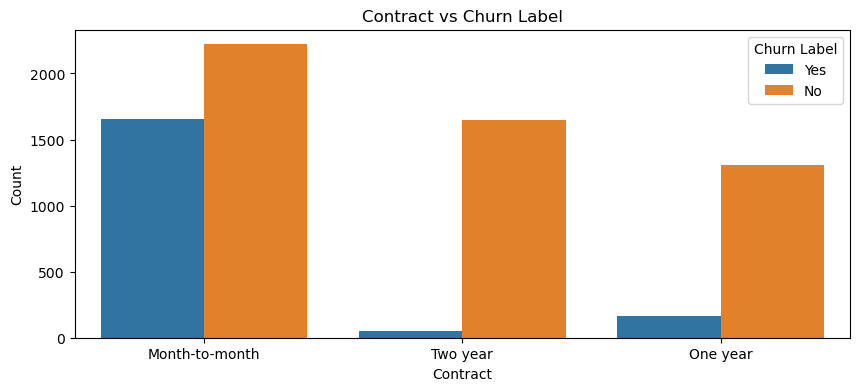

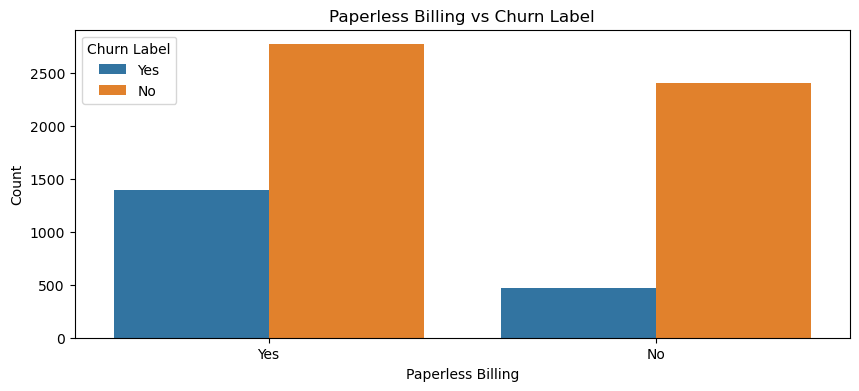

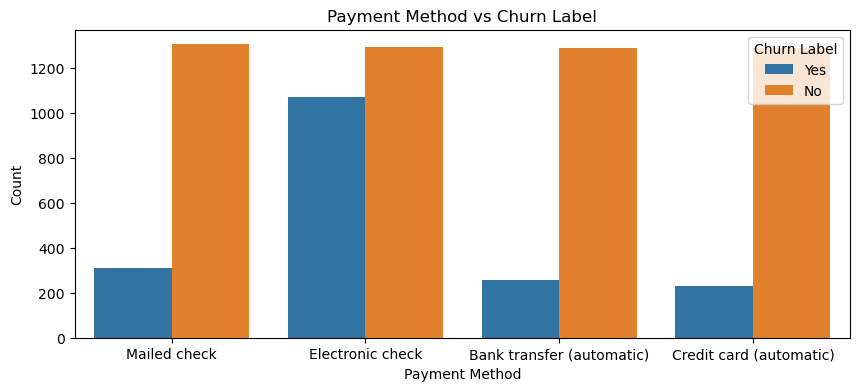

In [21]:
#Bivariate Analysis examines the relationship between two variables.
# Bivariate analysis of numerical features against the target variable
target_variable = 'Churn Label'

for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=target_variable, y=feature, data=df)
    plt.title(f'{feature} vs {target_variable}')
    plt.xlabel(target_variable)
    plt.ylabel(feature)
    plt.show()

# Bivariate analysis of categorical features against the target variable
for feature in categorical_features:
    if feature != 'Churn Label':
        plt.figure(figsize=(10, 4))
        sns.countplot(x=feature, hue=target_variable, data=df)
        plt.title(f'{feature} vs {target_variable}')
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.show()

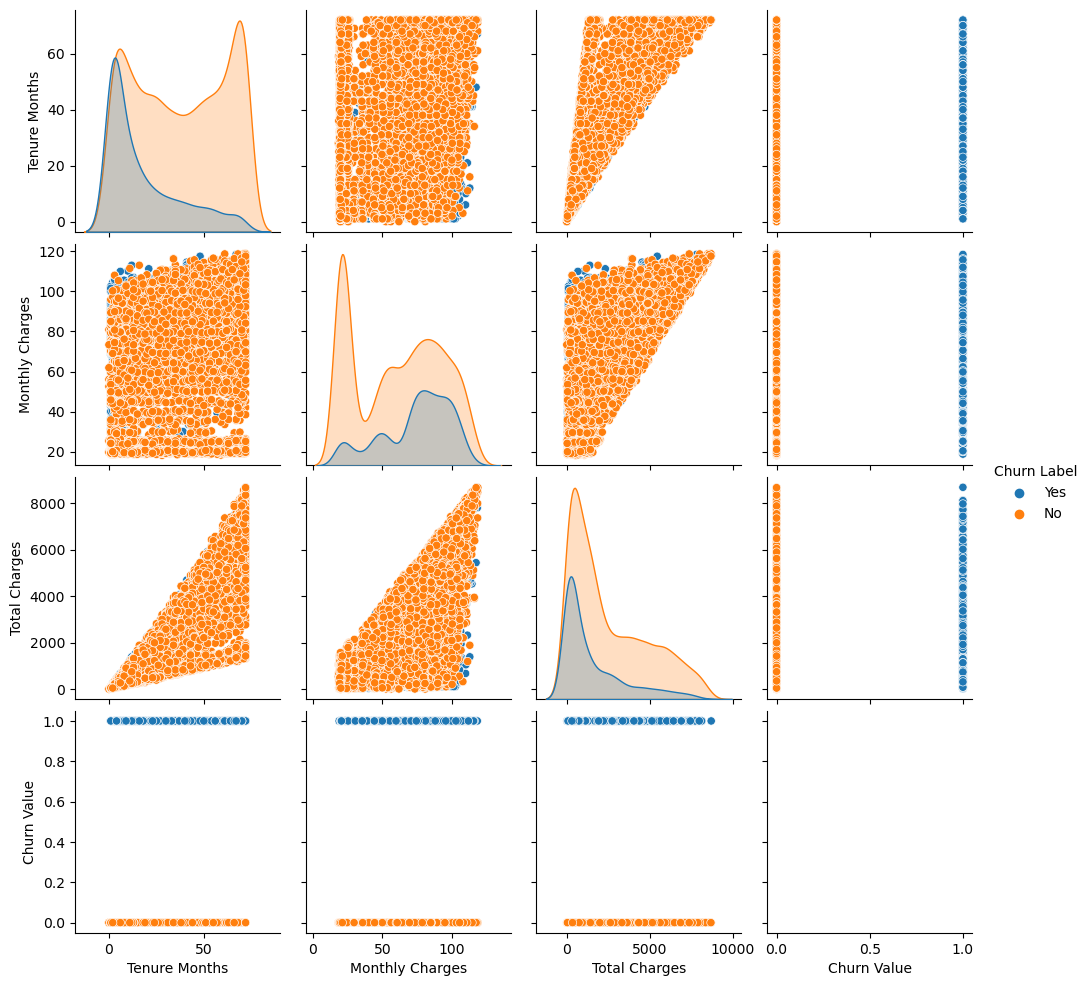

In [38]:
# Simplify the pairplot to focus on key features
key_features = ['Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Value']
sns.pairplot(df[key_features + ['Churn Label']], hue='Churn Label', diag_kind='kde')
plt.show()

# Machine Learning Modeling

1. Train-Test Split
2. Model Selection
3. Model Training
4. Model Evaluation

Train-Test Split

In [22]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_encoded.drop('Churn Label', axis=1)
y = df_encoded['Churn Label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the resulting arrays
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (5634, 35)
Shape of X_test: (1409, 35)
Shape of y_train: (5634,)
Shape of y_test: (1409,)


In [23]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Selection

1. Logistic Regression
2. Random Forest 
3. SVM
4. KNN



In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Initialize models
log_reg = LogisticRegression()
rf_clf = RandomForestClassifier()
svc_clf = SVC()
knn_clf = KNeighborsClassifier()

# Dictionary of models for iteration
models = {
    "Logistic Regression": log_reg,
    "Random Forest": rf_clf,
    "Support Vector Classifier": svc_clf,
    "K-Nearest Neighbors": knn_clf
}

# Model Training

In [25]:
# Initialize models
log_reg = LogisticRegression()
rf_clf = RandomForestClassifier()
svc_clf = SVC()
knn_clf = KNeighborsClassifier()

In [26]:

models = {
    "Logistic Regression": log_reg,
    "Random Forest": rf_clf,
    "Support Vector Classifier": svc_clf,
    "K-Nearest Neighbors": knn_clf
}


In [27]:

# Train each model
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained successfully.")

Logistic Regression trained successfully.
Random Forest trained successfully.
Support Vector Classifier trained successfully.
K-Nearest Neighbors trained successfully.


# Model Evaluation

In [28]:

# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1


In [29]:
# Evaluate each model
for name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X_test, y_test)
    print(f"{name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")


Logistic Regression - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000
Random Forest - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000
Support Vector Classifier - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000


c:\Users\User\anaconda3\anaconda 4\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


K-Nearest Neighbors - Accuracy: 0.9851, Precision: 0.9822, Recall: 0.9650, F1-Score: 0.9735


In [30]:

# Function to plot confusion matrix
def plot_confusion_matrix(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Confusion Matrix

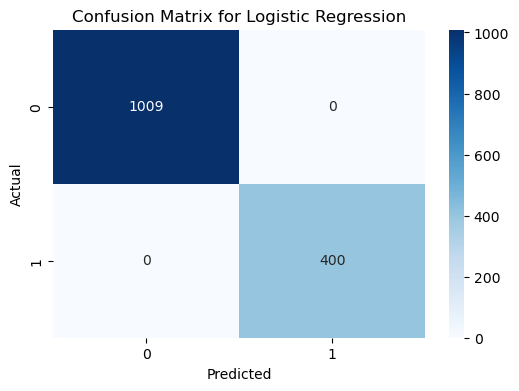

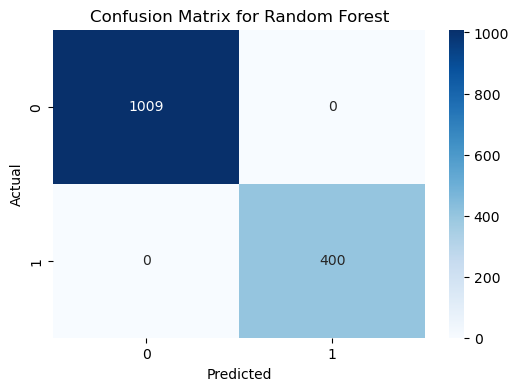

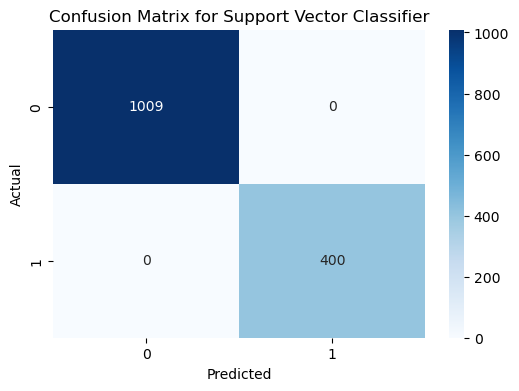

c:\Users\User\anaconda3\anaconda 4\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


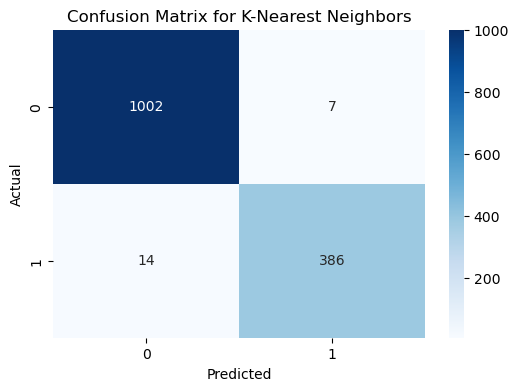

In [31]:
# Plot confusion matrix for each model
for name, model in models.items():
    plot_confusion_matrix(model, X_test, y_test, name)


# Cross-Validation

In [33]:
# Function to perform cross-validation
def cross_validate_model(model, X, y):
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    return scores.mean(), scores.std()


In [34]:
# Cross-validate each model
for name, model in models.items():
    mean_score, std_dev = cross_validate_model(model, X, y)
    print(f"{name} - Cross-Validation Accuracy: {mean_score:.4f} ± {std_dev:.4f}")

c:\Users\User\anaconda3\anaconda 4\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\User\anaconda3\anaconda 4\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

Logistic Regression - Cross-Validation Accuracy: 0.9338 ± 0.0097
Random Forest - Cross-Validation Accuracy: 1.0000 ± 0.0000
Support Vector Classifier - Cross-Validation Accuracy: 0.7346 ± 0.0002


c:\Users\User\anaconda3\anaconda 4\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\User\anaconda3\anaconda 4\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be ac

K-Nearest Neighbors - Cross-Validation Accuracy: 0.7751 ± 0.0033


In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Evaluate each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"\n{name} Model Evaluation:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))


Logistic Regression Model Evaluation:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[1009    0]
 [   0  400]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1009
           1       1.00      1.00      1.00       400

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409


Random Forest Model Evaluation:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[1009    0]
 [   0  400]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1009
           1       1.00      1.00      1.00       400

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409


Sup

c:\Users\User\anaconda3\anaconda 4\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)



K-Nearest Neighbors Model Evaluation:
Accuracy: 0.9851
Precision: 0.9822
Recall: 0.9650
F1 Score: 0.9735
Confusion Matrix:
[[1002    7]
 [  14  386]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1009
           1       0.98      0.96      0.97       400

    accuracy                           0.99      1409
   macro avg       0.98      0.98      0.98      1409
weighted avg       0.99      0.99      0.99      1409

